    In this project, we have worked with time series data. Where we have:-
    Sourced the data(trending terms) from Google trends.
    Wrangle and performed Exploratory Data Analysis.
    Identified Trends overtime.
    Plotted the time series seasonal difference.
    Found the correlation between trends.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('trend.csv', skiprows=1)

In [3]:
df.head()

,Week,covid,lockdown,hospital,vaccine
0,2016-08-21,0,<1,11,1
1,2016-08-28,<1,<1,12,1
2,2016-09-04,<1,<1,11,1
3,2016-09-11,<1,<1,11,1
4,2016-09-18,<1,<1,11,1


In [4]:
df.dtypes

Week        object
covid       object
lockdown    object
hospital     int64
vaccine     object
dtype: object

In [5]:
from datetime import datetime
df.set_index('Week', inplace=True)

In [6]:
df.head()

,covid,lockdown,hospital,vaccine
Week,,,,
2016-08-21,0,<1,11,1
2016-08-28,<1,<1,12,1
2016-09-04,<1,<1,11,1
2016-09-11,<1,<1,11,1
2016-09-18,<1,<1,11,1


In [7]:
df['covid']= df['covid'].replace('<1',0)
df['lockdown']= df['lockdown'].replace('<1',0)
df['vaccine']=df['vaccine'].replace('<1',0)
df.head()

,covid,lockdown,hospital,vaccine
Week,,,,
2016-08-21,0,0,11,1
2016-08-28,0,0,12,1
2016-09-04,0,0,11,1
2016-09-11,0,0,11,1
2016-09-18,0,0,11,1


In [8]:
df.tail()

,covid,lockdown,hospital,vaccine
Week,,,,
2021-07-11,73,3,15,15
2021-07-18,80,2,14,16
2021-07-25,80,3,14,18
2021-08-01,89,3,14,25
2021-08-08,81,2,15,20


In [9]:
df['covid']=df['covid'].astype(int)
df['lockdown']=df['lockdown'].astype(int)
df['vaccine']=df['vaccine'].astype(int)

Let's Check The Trend Of Covid Search On Google Overtime.

We will use the average of the last 12 data points to check the trend. We will use a technique called rolling average.

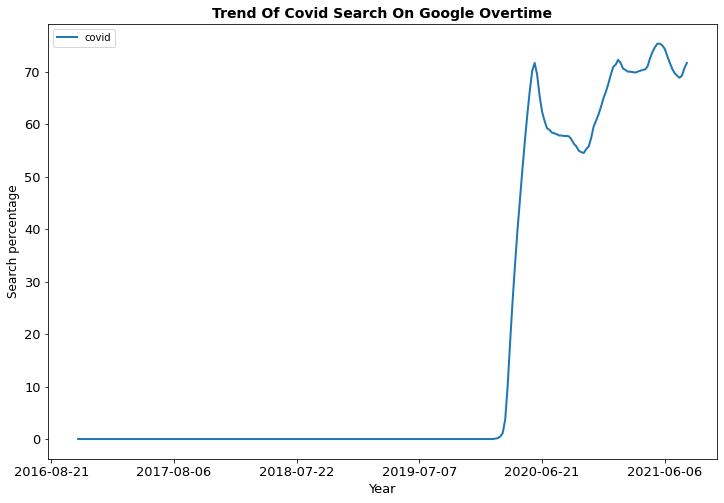

In [10]:
covid = df[['covid']]
covid.rolling(12).mean().plot(figsize=(12,8), linewidth=2, fontsize=13)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Search percentage', fontsize=12)
plt.title('Trend Of Covid Search On Google Overtime',
          fontsize=14,fontweight='bold');

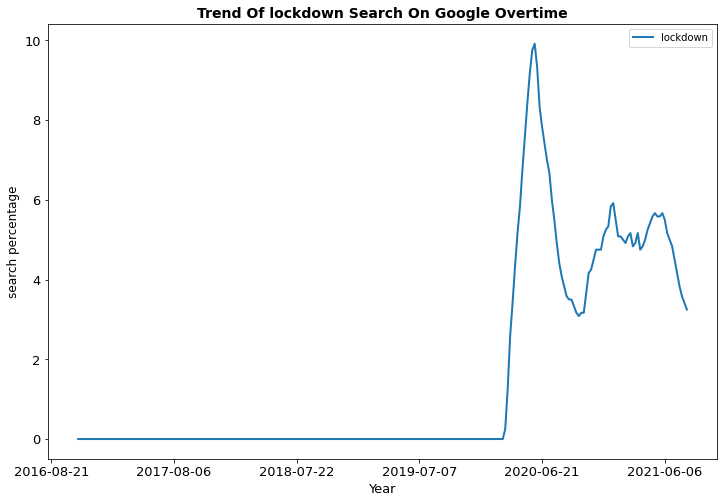

In [11]:
lockdown = df[['lockdown']]
lockdown.rolling(12).mean().plot(figsize=(12,8), linewidth=2, fontsize=13)
plt.xlabel('Year', fontsize=13)
plt.ylabel('search percentage',fontsize=12)
plt.title('Trend Of lockdown Search On Google Overtime',
          fontsize=14,fontweight='bold');

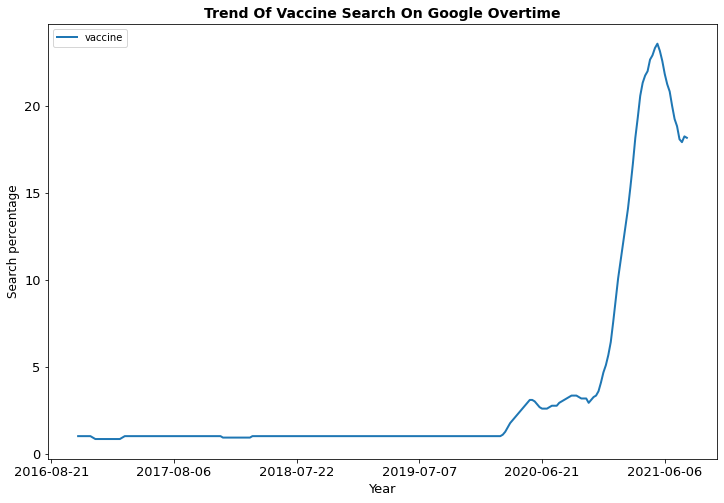

In [12]:
vaccine = df[['vaccine']]
vaccine.rolling(12).mean().plot(figsize=(12,8), linewidth=2, fontsize=13)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Search percentage', fontsize=12)
plt.title('Trend Of Vaccine Search On Google Overtime',
          fontsize=14,fontweight='bold');

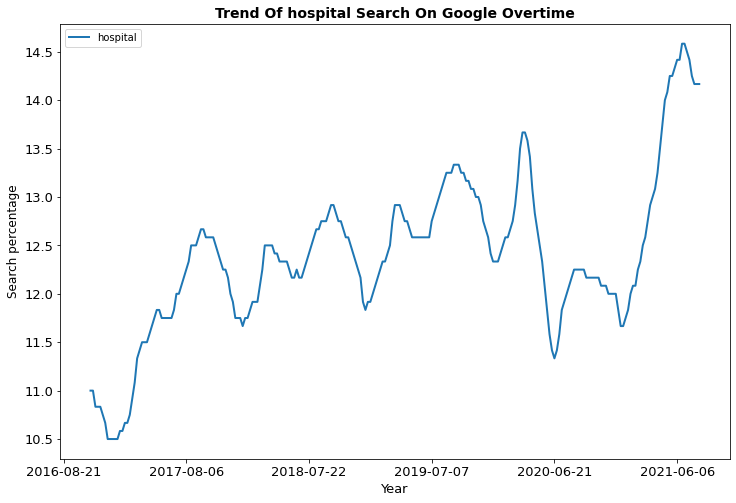

In [13]:
hospital = df[['hospital']]
hospital.rolling(12).mean().plot(figsize=(12,8), linewidth=2, fontsize=13)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Search percentage', fontsize=12)
plt.title('Trend Of hospital Search On Google Overtime',
          fontsize=14,fontweight='bold');

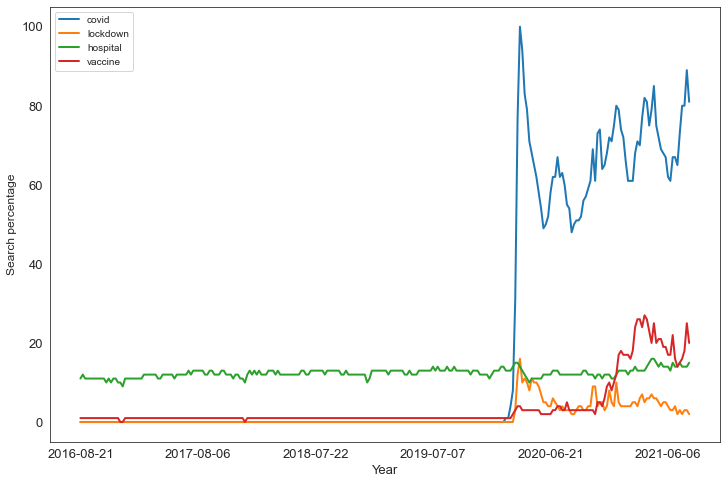

In [14]:
sns.set_style(style='white')
df.plot(figsize=(12,8), linewidth=2, fontsize=13)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Search percentage', fontsize=12);

We can see from the above that, people use to search hospital on Google all these time. However, untill 2020, people were not searching on Google for anything relating to Covid19 or Lockdown, and that is because Covid19 and Lockdown noise started in the year 2020 onwards. From the year April, 2020 onwards, people began to search more on Google for queries relating to Covid19 and Vaccine and that is why you can see their respective graphs shooting upwards like that. The search for queries relating to Lockdown also arosed and fell due to the fact that governments impose the lockdown and relaese when things become better

#### Seasonal Patterns in Time Series Data

We have used use pandas and the diff() and plot() methods to compute and plot the first order difference of the **covid** Series:

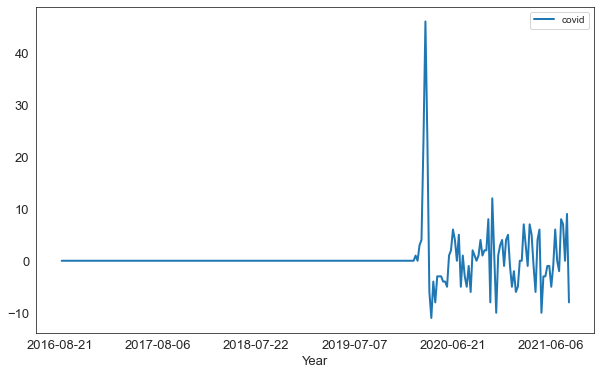

In [15]:
covid.diff().plot(figsize=(10,6), linewidth=2, fontsize=13)
plt.xlabel('Year', fontsize=13);

#### lockdown series

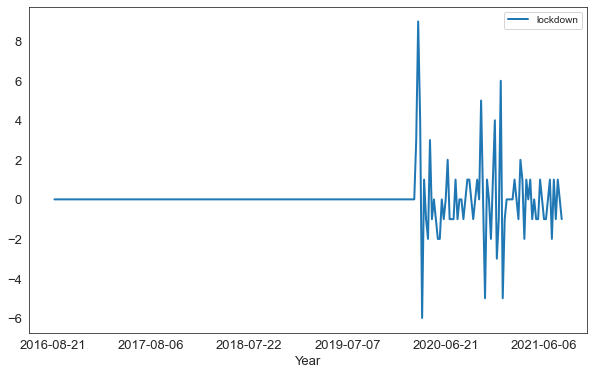

In [16]:
lockdown.diff().plot(figsize=(10,6), linewidth=2, fontsize=13)
plt.xlabel('Year', fontsize=13);

#### vaccine series

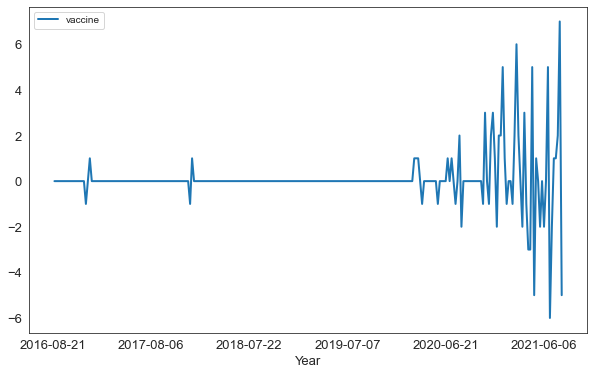

In [17]:
vaccine.diff().plot(figsize=(10,6), linewidth=2, fontsize=13)
plt.xlabel('Year', fontsize=13);

#### hospital series

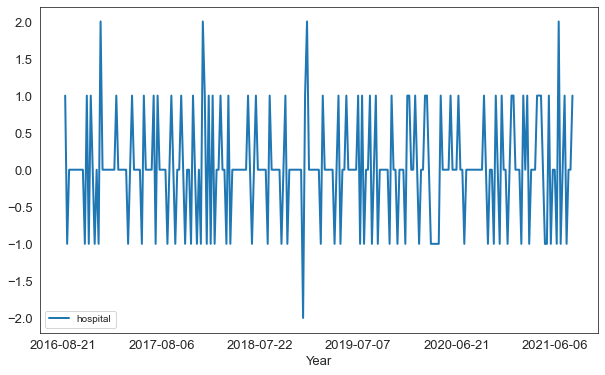

In [18]:
hospital.diff().plot(figsize=(10,6), linewidth=2, fontsize=13)
plt.xlabel('Year', fontsize=13);

### **Correlations**

In [19]:
df.corr()

,covid,lockdown,hospital,vaccine
covid,1.000000,0.880341,0.283891,0.746300
lockdown,0.880341,1.000000,0.146712,0.511370
hospital,0.283891,0.146712,1.000000,0.484511
vaccine,0.746300,0.511370,0.484511,1.000000


We can see from the above correlation matrix that **covid** and **lockdown** are highly correlated, about **0.88** followed by **covid** and **vaccine**, about **0.74**.


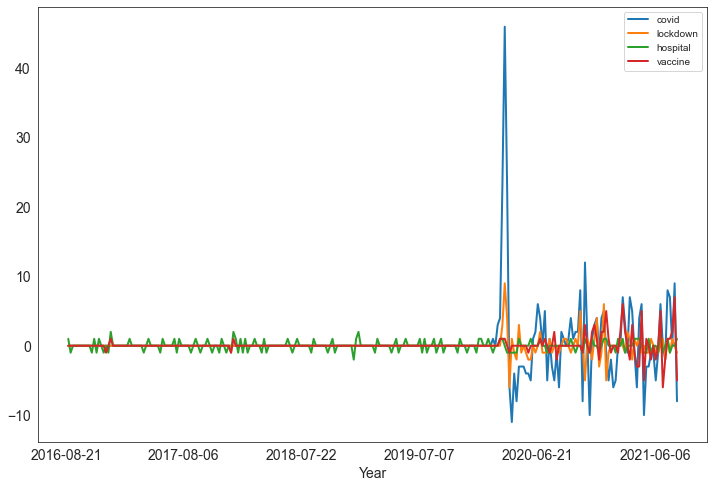

In [20]:
df.diff().plot(figsize=(12,8), linewidth=2, fontsize=14)
plt.xlabel('Year', fontsize=14);

###### The correlation matrix is also reflected above. As blue line(covid) goes up, we see both the green(vaccine) and red(lockdown) going up as well and vice-versa.